In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = sm.datasets.co2.load_pandas().data
data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


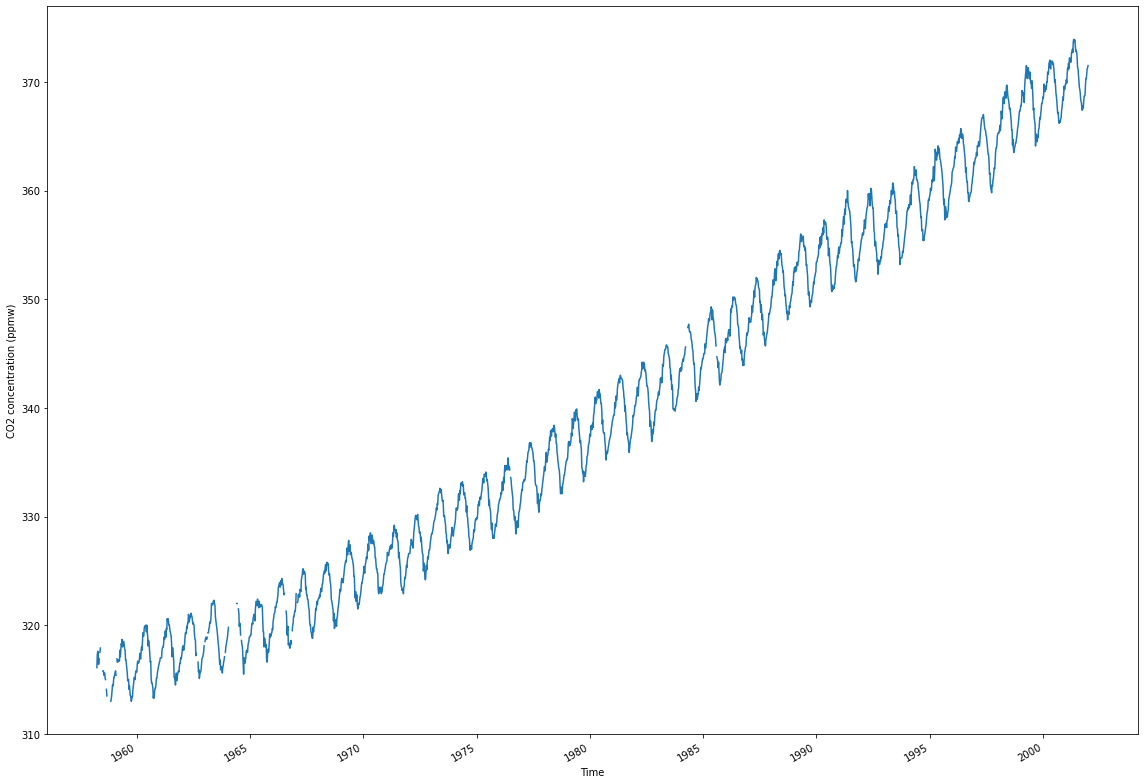

In [3]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(data['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentration (ppmw)')
fig.autofmt_xdate()
plt.tight_layout()

In [4]:
#Interpolasi merupakan teknik untuk mencari nilai suatu variabel yang hilang pada rentang data yang diketahui
#digunakan interpolasi linear -> f(x) = y1 + (x – x1) ((y2 – y1)/(x2 – x1))
data = data.interpolate()

In [5]:
data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


# There are 3 different ways in which we can frame a time series forecasting problem as a supervised learning problem:

# 1) Predict the next time step using the previous observation
# 2) Predict the next time step using a sequence of past observations
# 3) Predict a sequence of future time steps using a sequence of past observations

In [6]:

# membentuk prediktor pada time (i) ialah nilai co2 ke (i+1)
#yt_hat=yt+1
df = data.copy()
df['y'] = df['co2'].shift(-1)

In [7]:
df

,co2,y
1958-03-29,316.1,317.3
1958-04-05,317.3,317.6
1958-04-12,317.6,317.5
1958-04-19,317.5,316.4
1958-04-26,316.4,316.9
...,...,...
2001-12-01,370.3,370.8
2001-12-08,370.8,371.2
2001-12-15,371.2,371.3
2001-12-22,371.3,371.5


In [8]:
train = df[:-104]
test = df[-104:]
test = test.drop(test.tail(1).index) # Drop last row

In [9]:
train

,co2,y
1958-03-29,316.1,317.3
1958-04-05,317.3,317.6
1958-04-12,317.6,317.5
1958-04-19,317.5,316.4
1958-04-26,316.4,316.9
...,...,...
1999-12-04,367.4,368.0
1999-12-11,368.0,368.0
1999-12-18,368.0,368.2
1999-12-25,368.2,368.6


In [10]:
test

,co2,y
2000-01-08,368.5,369.0
2000-01-15,369.0,369.8
2000-01-22,369.8,369.2
2000-01-29,369.2,369.1
2000-02-05,369.1,369.6
...,...,...
2001-11-24,370.3,370.3
2001-12-01,370.3,370.8
2001-12-08,370.8,371.2
2001-12-15,371.2,371.3


In [11]:
#baseline model / model naive
test = test.copy()
test['baseline_pred'] = test['co2']

In [12]:
test

,co2,y,baseline_pred
2000-01-08,368.5,369.0,368.5
2000-01-15,369.0,369.8,369.0
2000-01-22,369.8,369.2,369.8
2000-01-29,369.2,369.1,369.2
2000-02-05,369.1,369.6,369.1
...,...,...,...
2001-11-24,370.3,370.3,370.3
2001-12-01,370.3,370.8,370.3
2001-12-08,370.8,371.2,370.8
2001-12-15,371.2,371.3,371.2


In [13]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
X_train = train['co2'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['co2'].values.reshape(-1,1)
# Initialize the model
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X=X_train, y=y_train)
# Make predictions
dt_pred = dt_reg.predict(X_test)
# Assign predictions to a new column in test
test['dt_pred'] = dt_pred

In [14]:
test

,co2,y,baseline_pred,dt_pred
2000-01-08,368.5,369.0,368.5,368.650000
2000-01-15,369.0,369.8,369.0,368.500000
2000-01-22,369.8,369.2,369.8,369.400000
2000-01-29,369.2,369.1,369.2,369.100000
2000-02-05,369.1,369.6,369.1,368.800000
...,...,...,...,...
2001-11-24,370.3,370.3,370.3,370.533333
2001-12-01,370.3,370.8,370.3,370.533333
2001-12-08,370.8,371.2,370.8,370.800000
2001-12-15,371.2,371.3,371.2,371.000000


In [15]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y=y_train.ravel())
gbr_pred = gbr.predict(X_test)
test['gbr_pred'] = gbr_pred

In [16]:
test

,co2,y,baseline_pred,dt_pred,gbr_pred
2000-01-08,368.5,369.0,368.5,368.650000,368.556464
2000-01-15,369.0,369.8,369.0,368.500000,368.774435
2000-01-22,369.8,369.2,369.8,369.400000,369.512468
2000-01-29,369.2,369.1,369.2,369.100000,369.041813
2000-02-05,369.1,369.6,369.1,368.800000,368.774435
...,...,...,...,...,...
2001-11-24,370.3,370.3,370.3,370.533333,370.535661
2001-12-01,370.3,370.8,370.3,370.533333,370.535661
2001-12-08,370.8,371.2,370.8,370.800000,370.710834
2001-12-15,371.2,371.3,371.2,371.000000,371.049344


In [17]:
#mean absolute percentage error (MAPE)
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

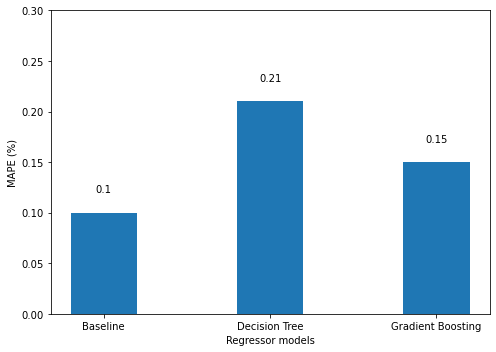

In [18]:
baseline_mape = mape(test['y'], test['baseline_pred'])
dt_mape = mape(test['y'], test['dt_pred'])
gbr_mape = mape(test['co2'], test['gbr_pred'])
# Generate bar plot
fig, ax = plt.subplots(figsize=(7, 5))
x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_mape, gbr_mape]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 0.3)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.02, s=str(value), ha='center')
    
plt.tight_layout()

In [19]:
test=np.array(test)

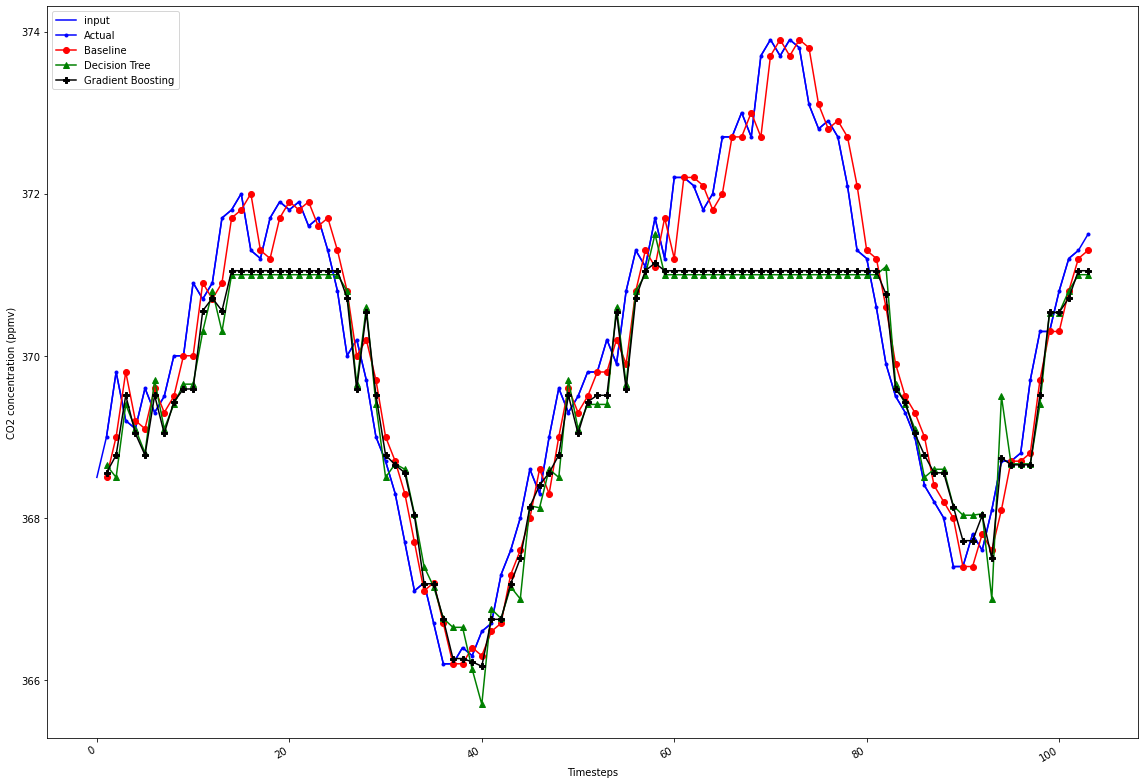

In [20]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(np.arange(0, 103, 1), test[:,0], 'b-', label='input')
ax.plot(np.arange(1, 104, 1), test[:,1], marker='.', color='blue', label='Actual')
ax.plot(np.arange(1, 104, 1), test[:,2], marker='o', color='red', label='Baseline')
ax.plot(np.arange(1, 104, 1), test[:,3], marker='^', color='green', label='Decision Tree')
ax.plot(np.arange(1, 104, 1), test[:,4], marker='P', color='black', label='Gradient Boosting')
ax.set_xlabel('Timesteps')
ax.set_ylabel('CO2 concentration (ppmv)')
# plt.xticks(np.arange(1, 104, 52), np.arange(2000, 2002, 1))
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()

In [21]:
# yt-n,...,yt-1,yt=yt+1
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['co2'].shift(-i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['co2'].shift(-i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [22]:
new_df = window_input(5, data)

In [23]:
new_df.head(10)

,co2,x_1,x_2,x_3,x_4,y
1958-03-29,316.10,317.30,317.60,317.50,316.40,316.90
1958-04-05,317.30,317.60,317.50,316.40,316.90,317.20
1958-04-12,317.60,317.50,316.40,316.90,317.20,317.50
1958-04-19,317.50,316.40,316.90,317.20,317.50,317.90
1958-04-26,316.40,316.90,317.20,317.50,317.90,317.55
1958-05-03,316.90,317.20,317.50,317.90,317.55,317.20
1958-05-10,317.20,317.50,317.90,317.55,317.20,316.85
1958-05-17,317.50,317.90,317.55,317.20,316.85,316.50
1958-05-24,317.90,317.55,317.20,316.85,316.50,316.15
1958-05-31,317.55,317.20,316.85,316.50,316.15,315.80


In [24]:
from sklearn.model_selection import train_test_split

X = new_df[['co2', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [25]:
X_test

array([[358.3, 358.5, 358.1, 358.8, 359.1],
       [358.5, 358.1, 358.8, 359.1, 358.8],
       [358.1, 358.8, 359.1, 358.8, 359.4],
       ...,
       [368.8, 369.7, 370.3, 370.3, 370.8],
       [369.7, 370.3, 370.3, 370.8, 371.2],
       [370.3, 370.3, 370.8, 371.2, 371.3]])

In [26]:
#baseline / naive model
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

In [27]:
baseline_pred

[358.56000000000006,
 358.65999999999997,
 358.84,
 359.21999999999997,
 359.38,
 359.50000000000006,
 359.88,
 360.12,
 360.17999999999995,
 360.2,
 360.23999999999995,
 359.96,
 359.66,
 359.18,
 358.84000000000003,
 358.48,
 357.93999999999994,
 357.41999999999996,
 357.0,
 356.58000000000004,
 355.94000000000005,
 355.56,
 355.12,
 354.6,
 354.17999999999995,
 353.96,
 353.78,
 353.67999999999995,
 353.84000000000003,
 353.96000000000004,
 354.06,
 354.23999999999995,
 354.5,
 354.82,
 355.14,
 355.52000000000004,
 355.88,
 356.23999999999995,
 356.62,
 357.03999999999996,
 357.41999999999996,
 357.8,
 358.08,
 358.32,
 358.38,
 358.48,
 358.6,
 358.85999999999996,
 358.86,
 359.14,
 359.5,
 359.86,
 360.06000000000006,
 360.52,
 360.76000000000005,
 360.94,
 361.21999999999997,
 361.41999999999996,
 361.5,
 361.64,
 361.75999999999993,
 361.52,
 361.4,
 361.3,
 361.1,
 360.76000000000005,
 360.53999999999996,
 360.21999999999997,
 359.84,
 359.46,
 359.03999999999996,
 358.5600000

In [28]:
# decision tree
dt_reg_5 = DecisionTreeRegressor(random_state=42)

dt_reg_5.fit(X_train, y_train)

dt_reg_5_pred = dt_reg_5.predict(X_test)

In [29]:
dt_reg_5_pred

array([358.9, 360. , 359.2, 358.5, 359.6, 358.7, 360. , 360.2, 358.7,
       358.4, 358.4, 360.2, 358.7, 358.4, 358.4, 359.1, 355.2, 355.2,
       355.3, 356.7, 354.9, 354.5, 353.5, 353.6, 354.7, 354.7, 354.7,
       355. , 355. , 354.9, 354.7, 354.8, 355.5, 356. , 355.9, 356.9,
       356.1, 356.6, 356.9, 358.3, 358.3, 358.9, 358.9, 359.1, 358.8,
       359.6, 358.9, 358.9, 359.6, 359. , 360. , 360.2, 358.7, 358.4,
       358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4,
       358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 360. , 358.4, 357.2,
       357.2, 355.2, 355.2, 355.6, 355.3, 355.5, 354.5, 354.5, 355.9,
       356.9, 356.1, 356.6, 358.3, 358.3, 358.3, 359.1, 359.2, 359.2,
       359.2, 359. , 358.5, 360. , 358.6, 358.7, 358.4, 358.4, 358.4,
       358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4,
       358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4,
       358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 358.4, 359. ,
       357.2, 358.4,

In [30]:
gbr_5 = GradientBoostingRegressor(random_state=42)

gbr_5.fit(X_train, y_train.ravel())

gbr_5_pred = gbr_5.predict(X_test)

In [31]:
pd.DataFrame(gbr_5_pred)

,0
0,359.062403
1,359.004005
2,359.164342
3,359.152086
4,359.290122
...,...
451,359.400633
452,359.400633
453,359.400633
454,359.400633


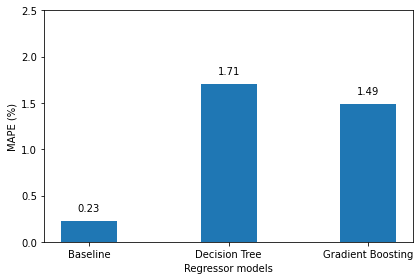

In [32]:
baseline_mape = mape(y_test, baseline_pred)
dt_5_mape = mape(y_test, dt_reg_5_pred)
gbr_5_mape = mape(y_test, gbr_5_pred)
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_5_mape, gbr_5_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 2.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')
    
plt.tight_layout()

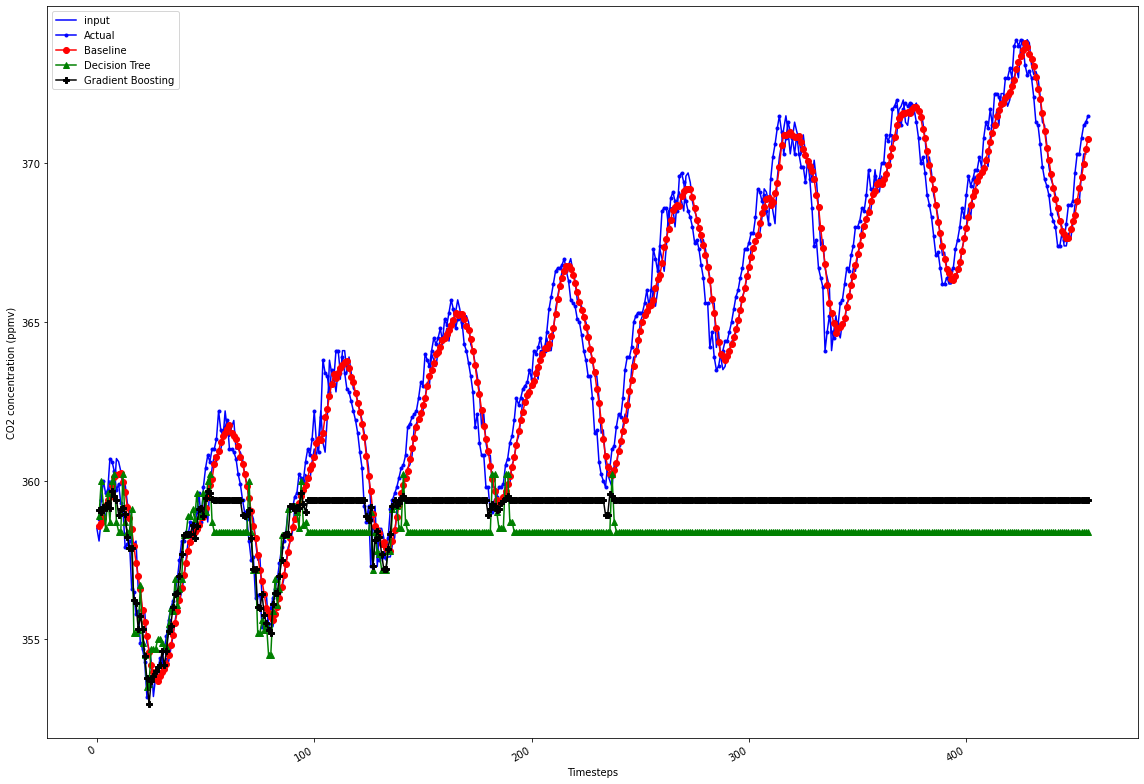

In [33]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(np.arange(0, 456, 1), X_test[:456,1], 'b-', label='input')
ax.plot(np.arange(1, 457, 1), y_test, marker='.', color='blue', label='Actual')
ax.plot(np.arange(1, 457, 1), baseline_pred, marker='o', color='red', label='Baseline')
ax.plot(np.arange(1, 457, 1), dt_reg_5_pred, marker='^', color='green', label='Decision Tree')
ax.plot(np.arange(1, 457, 1), gbr_5_pred, marker='P', color='black', label='Gradient Boosting')
ax.set_xlabel('Timesteps')
ax.set_ylabel('CO2 concentration (ppmv)')
# plt.xticks(np.arange(1, 104, 52), np.arange(2000, 2002, 1))
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()

In [34]:
# yt-n,...,yt-1,yt=yt+1,yt+2,...,yt+m
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < input_length:
        df[f'x_{i}'] = df['co2'].shift(-i)
        i = i + 1
        
    j = 0
    while j < output_length:
        df[f'y_{j}'] = df['co2'].shift(-output_length-j)
        j = j + 1
        
    df = df.dropna(axis=0)
    
    return df

In [35]:
seq_df = window_input_output(26, 26, data)

In [36]:
seq_df

,co2,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25
1958-03-29,316.1,317.3,317.6,317.5,316.4,316.90,317.20,317.50,317.90,317.55,...,315.60,315.80,315.40,316.15,316.90,316.60,316.60,316.80,316.75,316.7
1958-04-05,317.3,317.6,317.5,316.4,316.9,317.20,317.50,317.90,317.55,317.20,...,315.80,315.40,316.15,316.90,316.60,316.60,316.80,316.75,316.70,316.7
1958-04-12,317.6,317.5,316.4,316.9,317.2,317.50,317.90,317.55,317.20,316.85,...,315.40,316.15,316.90,316.60,316.60,316.80,316.75,316.70,316.70,317.7
1958-04-19,317.5,316.4,316.9,317.2,317.5,317.90,317.55,317.20,316.85,316.50,...,316.15,316.90,316.60,316.60,316.80,316.75,316.70,316.70,317.70,317.1
1958-04-26,316.4,316.9,317.2,317.5,317.9,317.55,317.20,316.85,316.50,316.15,...,316.90,316.60,316.60,316.80,316.75,316.70,316.70,317.70,317.10,317.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-12-09,369.6,369.3,369.5,369.8,369.8,370.20,369.90,370.80,371.30,371.10,...,367.40,367.80,367.60,368.10,368.70,368.70,368.80,369.70,370.30,370.3
2000-12-16,369.3,369.5,369.8,369.8,370.2,369.90,370.80,371.30,371.10,371.70,...,367.80,367.60,368.10,368.70,368.70,368.80,369.70,370.30,370.30,370.8
2000-12-23,369.5,369.8,369.8,370.2,369.9,370.80,371.30,371.10,371.70,371.20,...,367.60,368.10,368.70,368.70,368.80,369.70,370.30,370.30,370.80,371.2
2000-12-30,369.8,369.8,370.2,369.9,370.8,371.30,371.10,371.70,371.20,372.20,...,368.10,368.70,368.70,368.80,369.70,370.30,370.30,370.80,371.20,371.3


In [37]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]

X_cols.insert(0, 'co2')

y_cols = [col for col in seq_df.columns if col.startswith('y')]
X_train = seq_df[X_cols][:-2].values
y_train = seq_df[y_cols][:-2].values

X_test = seq_df[X_cols][-2:].values
y_test = seq_df[y_cols][-2:].values

In [38]:
X_train.shape

(2231, 26)

In [39]:
X_test.shape

(2, 26)

In [40]:
y_train.shape

(2231, 26)

In [41]:
y_test

array([[372.7, 372.1, 371.3, 371.2, 370.6, 369.9, 369.5, 369.3, 369. ,
        368.4, 368.2, 368. , 367.4, 367.4, 367.8, 367.6, 368.1, 368.7,
        368.7, 368.8, 369.7, 370.3, 370.3, 370.8, 371.2, 371.3],
       [372.1, 371.3, 371.2, 370.6, 369.9, 369.5, 369.3, 369. , 368.4,
        368.2, 368. , 367.4, 367.4, 367.8, 367.6, 368.1, 368.7, 368.7,
        368.8, 369.7, 370.3, 370.3, 370.8, 371.2, 371.3, 371.5]])

In [42]:
# decision tree
dt_seq = DecisionTreeRegressor(random_state=42)

dt_seq.fit(X_train, y_train)

dt_seq_preds = dt_seq.predict(X_test)

In [43]:
dt_seq_preds

array([[372.9, 372.7, 372.1, 371.3, 371.2, 370.6, 369.9, 369.5, 369.3,
        369. , 368.4, 368.2, 368. , 367.4, 367.4, 367.8, 367.6, 368.1,
        368.7, 368.7, 368.8, 369.7, 370.3, 370.3, 370.8, 371.2],
       [372.9, 372.7, 372.1, 371.3, 371.2, 370.6, 369.9, 369.5, 369.3,
        369. , 368.4, 368.2, 368. , 367.4, 367.4, 367.8, 367.6, 368.1,
        368.7, 368.7, 368.8, 369.7, 370.3, 370.3, 370.8, 371.2]])

In [44]:
#Gradient boosting
from sklearn.multioutput import RegressorChain

gbr_seq = GradientBoostingRegressor(random_state=42)

chained_gbr = RegressorChain(gbr_seq)

chained_gbr.fit(X_train, y_train)

gbr_seq_preds = chained_gbr.predict(X_test)

In [45]:
gbr_seq_preds

array([[372.91234321, 372.86820684, 372.61138382, 372.37008977,
        371.87095143, 371.47195088, 370.98161883, 370.43302093,
        370.13214216, 369.84316676, 369.49160888, 369.10391475,
        368.7412755 , 368.12299369, 368.1457326 , 368.2817398 ,
        368.42397489, 368.48255593, 368.52800057, 368.56197186,
        368.69919888, 368.73954859, 368.87105273, 369.55968265,
        370.03369346, 370.56943566],
       [372.86757507, 372.88205801, 372.58891692, 372.39556035,
        371.83484914, 371.45982952, 370.98245107, 370.44375112,
        370.13214216, 369.84316676, 369.43672539, 369.10391475,
        368.7412755 , 368.12299369, 368.1457326 , 368.2817398 ,
        368.38945877, 368.48255593, 368.52800057, 368.56197186,
        368.69919888, 368.73954859, 368.79783389, 369.66977982,
        370.1106187 , 370.56943566]])

In [46]:
gbr_seq_preds.shape

(2, 26)

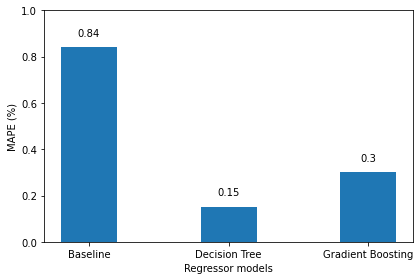

In [47]:
mape_dt_seq = mape(dt_seq_preds.reshape(1, -1), y_test.reshape(1, -1))
mape_gbr_seq = mape(gbr_seq_preds.reshape(1, -1), y_test.reshape(1, -1))
mape_baseline = mape(X_test.reshape(1, -1), y_test.reshape(1, -1))
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [mape_baseline, mape_dt_seq, mape_gbr_seq]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 1)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

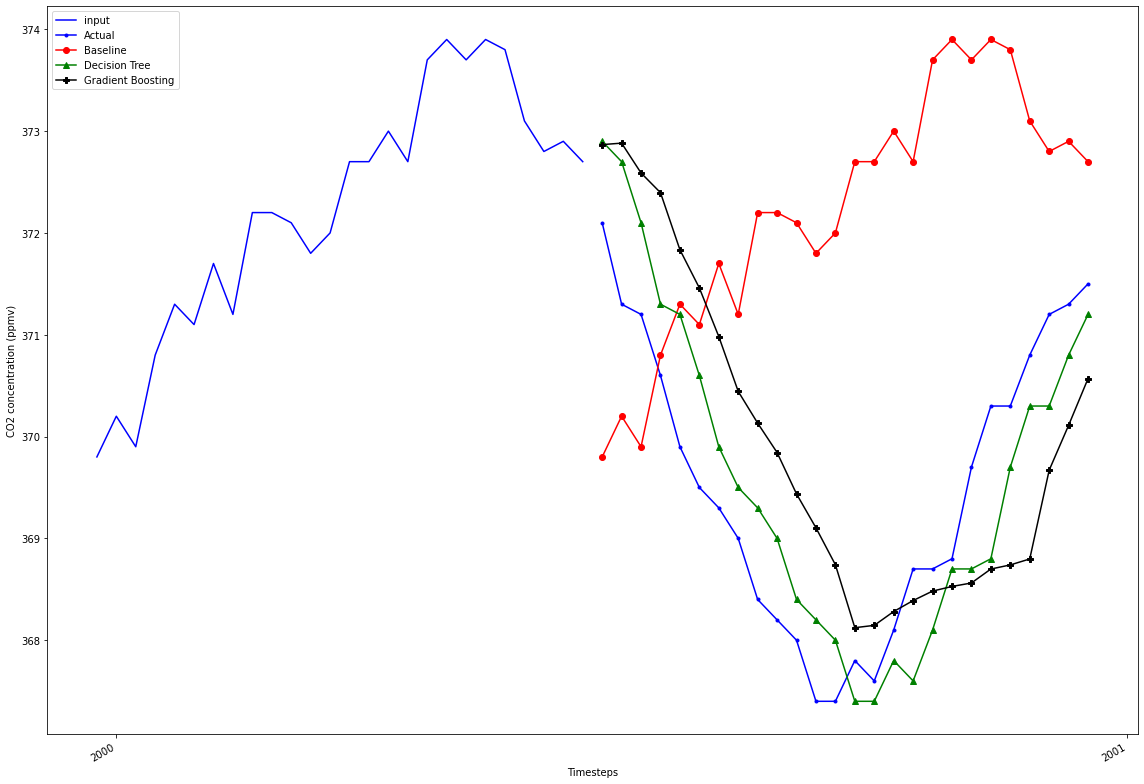

In [48]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(np.arange(0, 26, 1), X_test[1], 'b-', label='input')
ax.plot(np.arange(26, 52, 1), y_test[1], marker='.', color='blue', label='Actual')
ax.plot(np.arange(26, 52, 1), X_test[1], marker='o', color='red', label='Baseline')
ax.plot(np.arange(26, 52, 1), dt_seq_preds[1], marker='^', color='green', label='Decision Tree')
ax.plot(np.arange(26, 52, 1), gbr_seq_preds[1], marker='P', color='black', label='Gradient Boosting')
ax.set_xlabel('Timesteps')
ax.set_ylabel('CO2 concentration (ppmv)')
plt.xticks(np.arange(1, 104, 52), np.arange(2000, 2002, 1))
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()